In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit

In [2]:
#@jit
def Factorial( n ):
    
    res = 1.0
    
    for k in np.arange( 1, n + 1, 1 ):
        
        res = res * k
        
    return res

#@jit
def C( k, n ):
    
    global Factorial
    
    return Factorial( n ) / ( Factorial( k ) * Factorial( n - k ) )

In [3]:
def derivative( f, x, n ):
    
    if f == 'sin':
        
        return np.sin( x + n * np.pi / 2.0 )
    
    elif f == 'exp':
        
        return np.exp( x )

In [4]:
#@jit
def derivative2( f, x, n ):
    
    global C, Factorial
    
    Sum = 0.0
    
    SumC = 0.0
    
    for k in np.arange( 0, n, 1 ):
        
        SumC += C( k, n )
        
    h = ( 1.0e-8 * SumC * Factorial( n + 1 ) ) ** ( 1.0 / 2.0 / n )
    
    for k in np.arange( 0, n + 1, 1 ):
        
        Sum += ( -1.0 ) ** k * C( k, n ) * f( x + ( n - 2.0 * k ) * h )
        
    return Sum / ( 2.0 * h ) ** n

In [5]:
#@jit
def Makloren( f0, f, x ):
    
    global derivative2
    
    plt.figure( figsize = ( 12, 8 ) )
    plt.grid()
    
    eps = 1.0e-3
    
    n, mn = 1, 1.0
    
    true_val = f0( x )
    
    res = f0( 0.0 )
    
    err = 0.0
    
    while np.fabs( res - true_val ) >= eps and n <= 32:
        
        mn = mn * x / n
        
        res += derivative2( f0, 0.0, n ) * mn
        
        if f == 'sin':
        
            plt.plot( [ n, ], [ derivative2( f0, 0.0, n ), ], 'ro' )
            
            plt.plot( [ n, ], [ np.sin( 0.0 + n * np.pi / 2.0 ), ], 'bo' )
            
        if f == 'exp':
            
            #plt.plot( [ n, ], [ derivative2( f0, 0.0, n ) - 1.0, ], 'ro' )
            
            plt.plot( [ n, ], [ 2.0 * ( 3 ** 2 * 1.0e-8 * sum( [ C( i, n ) for i in np.arange( 0, n, 1 ) ] ) ) ** ( 1.0 / n ), ], 'go' )
            
            err += 2.0 * ( 3 ** 2 * 1.0e-8 * sum( [ C( i, n ) for i in np.arange( 0, n, 1 ) ] ) ) ** ( 1.0 / n ) * mn
        
        n += 1
        
        print( np.fabs( res - true_val ) )
        
    print( 'err', err )
        
    return res, n

0.020574459729130357
0.020574459729130357
0.00013536037604622297
err 0.0


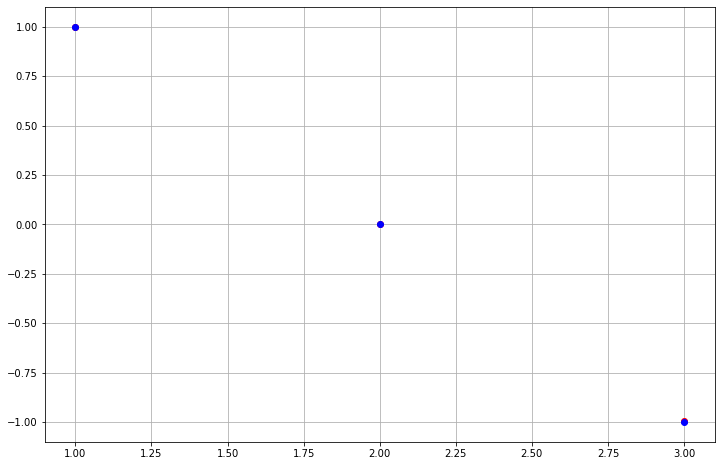

In [6]:
reSIN, Nsin = Makloren( np.sin, 'sin', 0.5 )

In [7]:
Nsin

4

0.14872126903353555
0.02370359036397951
0.002746105895028661
2.662085826399263e-05
err 0.0006647205400079374


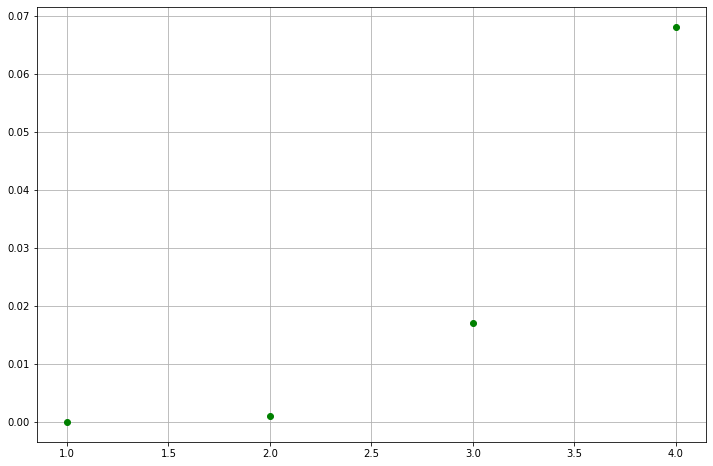

In [8]:
reEXP, Nexp = Makloren( np.exp, 'exp', 0.5 )

In [9]:
Nexp

5

11.37969572497167
11.37969572497167
180.41394826906875
180.41394826906875
729.482111017771
729.4821110177708
549.7714554211608
549.7714554211608
66.5012653807407
66.50126538074072
109.12746546041586
109.12746546041586
108.41112577911099
108.41112577911099
108.41277378492168
108.41277378492168
108.4127734999381
108.4127734999381
108.41277349993914
108.41277349993914
108.41277349993914
108.41277349993914
108.41277349993914
108.41277349993914
108.41277349993914
108.41277349993914
108.41277349993914
108.41277349993914
108.41277349993914
108.41277349993914
108.41277349993914
108.41277349993914
err 0.0


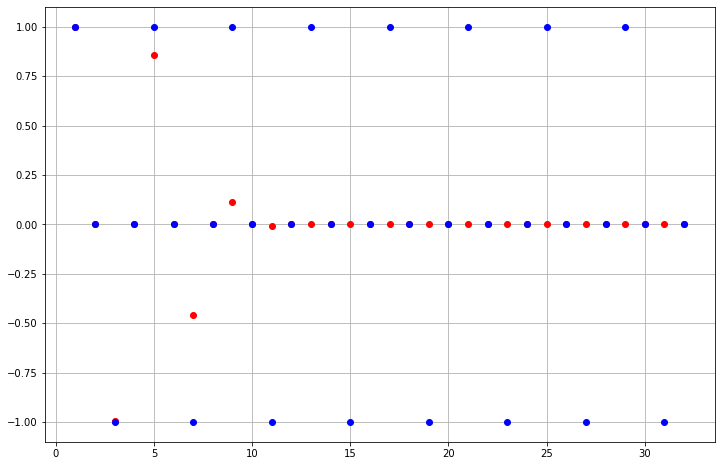

In [10]:
reeEXP2, Nexp2 = Makloren( np.sin, 'sin', 10.5 )

In [133]:
Nexp2

26

0.013797058670251525